In [1]:
#import data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import ElasticNetCV,LinearRegression,Lasso
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, mean_squared_error


Bad key "text.kerning_factor" on line 4 in
/Users/Tanner/opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
#Read in data
df = pd.read_csv('./datasets/train.csv')
df2 = pd.read_csv('./datasets/test.csv')

In [3]:
#Need to see all of the columns
pd.set_option('display.max_columns', None)

In [4]:
#What am I dealing with
df.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,NaN,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,NaN,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,NaN,Detchd,1957.0,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [5]:
#Get an idea of data types and null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               2051 non-null   int64  
 1   PID              2051 non-null   int64  
 2   MS SubClass      2051 non-null   int64  
 3   MS Zoning        2051 non-null   object 
 4   Lot Frontage     1721 non-null   float64
 5   Lot Area         2051 non-null   int64  
 6   Street           2051 non-null   object 
 7   Alley            140 non-null    object 
 8   Lot Shape        2051 non-null   object 
 9   Land Contour     2051 non-null   object 
 10  Utilities        2051 non-null   object 
 11  Lot Config       2051 non-null   object 
 12  Land Slope       2051 non-null   object 
 13  Neighborhood     2051 non-null   object 
 14  Condition 1      2051 non-null   object 
 15  Condition 2      2051 non-null   object 
 16  Bldg Type        2051 non-null   object 
 17  House Style   

In [6]:
#Review data
df.describe()

,Id,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2051.000000,2.051000e+03,2051.000000,1721.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2029.000000,2050.000000,2050.000000,2050.000000,2050.000000,2051.000000,2051.000000,2051.000000,2051.000000,2049.000000,2049.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,1937.000000,2050.000000,2050.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000
mean,1474.033642,7.135900e+08,57.008776,69.055200,10065.208191,6.112140,5.562165,1971.708922,1984.190151,99.695909,442.300488,47.959024,567.728293,1057.987805,1164.488055,329.329108,5.512921,1499.330083,0.427526,0.063446,1.577279,0.371039,2.843491,1.042906,6.435885,0.590931,1978.707796,1.776585,473.671707,93.833740,47.556802,22.571916,2.591419,16.511458,2.397855,51.574354,6.219893,2007.775719,181469.701609
std,843.980841,1.886918e+08,42.824223,23.260653,6742.488909,1.426271,1.104497,30.177889,21.036250,174.963129,461.204124,165.000901,444.954786,449.410704,396.446923,425.671046,51.068870,500.447829,0.522673,0.251705,0.549279,0.501043,0.826618,0.209790,1.560225,0.638516,25.441094,0.764537,215.934561,128.549416,66.747241,59.845110,25.229615,57.374204,37.782570,573.393985,2.744736,1.312014,79258.659352
min,1.000000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,753.500000,5.284581e+08,20.000000,58.000000,7500.000000,5.000000,5.000000,1953.500000,1964.500000,0.000000,0.000000,0.000000,220.000000,793.000000,879.500000,0.000000,0.000000,1129.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,319.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129825.000000
50%,1486.000000,5.354532e+08,50.000000,68.000000,9430.000000,6.000000,5.000000,1974.000000,1993.000000,0.000000,368.000000,0.000000,474.500000,994.500000,1093.000000,0.000000,0.000000,1444.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,162500.000000
75%,2198.000000,9.071801e+08,70.000000,80.000000,11513.500000,7.000000,6.000000,2001.000000,2004.000000,161.000000,733.750000,0.000000,811.000000,1318.750000,1405.000000,692.500000,0.000000,1728.500000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,2930.000000,9.241520e+08,190.000000,313.000000,159000.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,5095.000000,1862.000000,1064.000000,5642.000000,3.000000,2.000000,4.000000,2.000000,8.000000,3.000000,15.000000,4.000000,2207.000000,5.000000,1418.000000,1424.000000,547.000000,432.000000,508.000000,490.000000,800.000000,17000.000000,12.000000,2010.000000,611657.000000


In [7]:
#Remove outlier where price does not match living area
df = df[df['Gr Liv Area'] < 4000]

In [8]:
#Sum of missing values
df.isnull().sum()

Id                0
PID               0
MS SubClass       0
MS Zoning         0
Lot Frontage    330
               ... 
Misc Val          0
Mo Sold           0
Yr Sold           0
Sale Type         0
SalePrice         0
Length: 81, dtype: int64

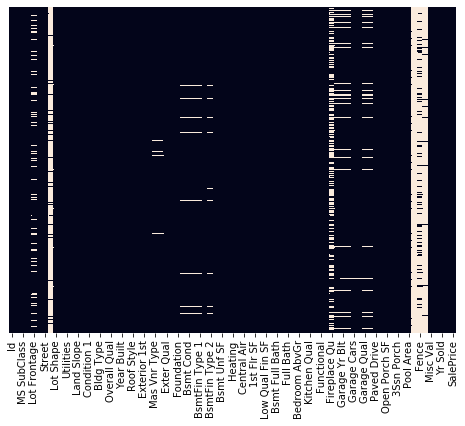

In [9]:
#Map missing values
plt.figure(figsize=(8,6))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

In [10]:
#Not enough data to use
df.drop(['Pool QC','Fence','Misc Feature','Id','Alley'],axis=1,inplace=True)

In [11]:
#Fill in missing values
df['BsmtFin SF 1']=df['BsmtFin SF 1'].fillna(0)
df ['Total Bsmt SF'] = df['Total Bsmt SF'].fillna(0)
df['Garage Area'] = df['Garage Area'].fillna(0)
df['Garage Cars']=df['Garage Cars'].fillna(0)
df['Lot Frontage'] = df['Lot Frontage'].fillna(df['Lot Frontage'].mean())
df = df[df['MS SubClass']!=150]


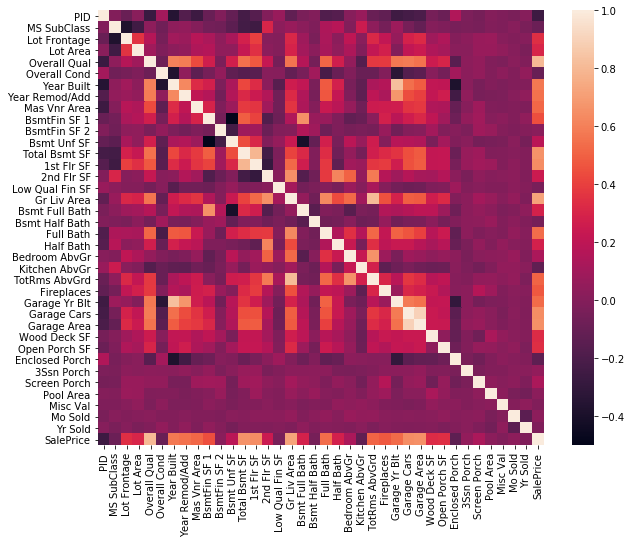

In [12]:
#Look over correlation between our variables
plt.figure(figsize=(10,8))
sns.heatmap(df.corr())

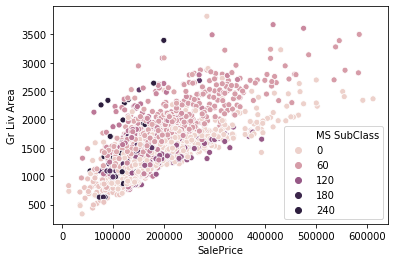

In [13]:
#Here and below were som key graphs that I went through changing values to see what effect certain variables have on price
sns.scatterplot(df['SalePrice'],df['Gr Liv Area'],hue = df['MS SubClass']);

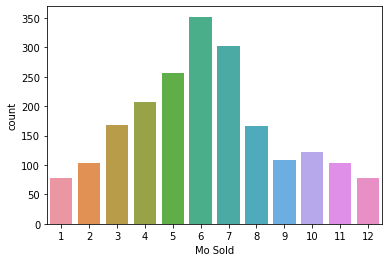

In [14]:
sns.countplot(df['Mo Sold'])

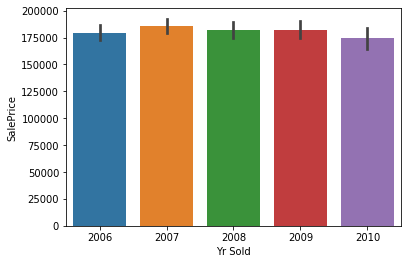

In [15]:
sns.barplot(df['Yr Sold'],df['SalePrice'])

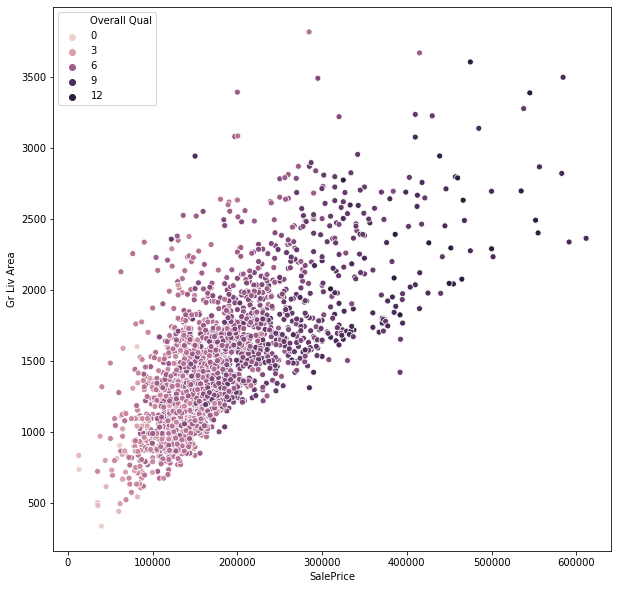

In [16]:
# I used this one a lot adjucting the hue to decide on what variabes to use
plt.figure(figsize=(10,10))
sns.scatterplot(df['SalePrice'],df['Gr Liv Area'],hue= df['Overall Qual']);

In [17]:
#See value count before making dummy variables to confirm viability
df['Neighborhood'].value_counts()

NAmes      310
CollgCr    180
OldTown    163
Edwards    141
Somerst    130
NridgHt    122
Gilbert    116
Sawyer     111
NWAmes      87
SawyerW     87
Mitchel     82
BrkSide     76
Crawfor     71
IDOTRR      69
Timber      48
NoRidge     48
StoneBr     38
SWISU       32
ClearCr     26
MeadowV     24
Blmngtn     22
BrDale      19
NPkVill     17
Veenker     17
Blueste      6
Greens       3
GrnHill      2
Landmrk      1
Name: Neighborhood, dtype: int64

In [18]:
#Makin all the dummies
df = pd.concat([df,pd.get_dummies(df['Foundation'],drop_first=True)], axis=1)
#df = pd.concat([df,pd.get_dummies(df['Mo Sold'],drop_first=True)], axis=1)
df = pd.concat([df,pd.get_dummies(df['Yr Sold'],drop_first=True)], axis=1)
df['GasA'] = [1 if i == 'GasA' else 0 for i in df['Heating']]
df['RL'] = [1 if i == 'RL' else 0 for i in df['MS Zoning']]
df['SBrkr'] = [1 if i == 'SBrkr' else 0 for i in df['Electrical']]
df = pd.concat([df,pd.get_dummies(df['Sale Type'],drop_first=True)], axis=1)
df = pd.concat([df,pd.get_dummies(df['Paved Drive'],drop_first=True)], axis=1)
df = pd.concat([df,pd.get_dummies(df['Neighborhood'],drop_first=True)], axis=1)
df = pd.concat([df,pd.get_dummies(df['MS SubClass'],drop_first=True)], axis=1)
#df = pd.concat([df,pd.get_dummies(df['Street'],drop_first=True)], axis=1) Removed, were not helpful for data
#df = pd.concat([df,pd.get_dummies(df['Lot Shape'],drop_first=True)], axis=1) Removed, were not helpful for data
df = pd.concat([df,pd.get_dummies(df['Lot Config'],drop_first=True)], axis=1)
df = pd.concat([df,pd.get_dummies(df['Exter Qual'],drop_first=True)], axis=1)
#df = pd.concat([df,pd.get_dummies(df['Exter Cond'],drop_first=True)], axis=1) Removed, were not helpful for data


In [19]:
#See all my new columns
df.columns

Index([         'PID',  'MS SubClass',    'MS Zoning', 'Lot Frontage',
           'Lot Area',       'Street',    'Lot Shape', 'Land Contour',
          'Utilities',   'Lot Config',
       ...
                  160,            180,            190,      'CulDSac',
                'FR2',          'FR3',       'Inside',           'Fa',
                 'Gd',           'TA'],
      dtype='object', length=146)

In [20]:
#Looking at the relation to see if 0 was a possible value
df['Year Remod/Add']-df['Year Built']

0       29
1        1
2       54
3        1
4       93
        ..
2046     0
2047    10
2048    22
2049     0
2050     0
Length: 2048, dtype: int64

In [21]:
#Creating new varaibles
df['Overall Cond2'] =  df['Overall Cond']*df['Overall Cond']
df['Overall Qual2'] =  df['Overall Qual'] * df['Overall Qual']
df['Half Bath2'] = df['Half Bath'] * df['Half Bath']
df['Overall Qual*Gr Liv Area'] = df['Overall Cond'] * df['Gr Liv Area']
df['Qual2*Cond2'] = df['Overall Cond2'] * df['Overall Qual2'] * df['Gr Liv Area']
df['Qual2*Cond3'] = df['Qual2*Cond2'] * df['Overall Cond']
df['Cond3*FBath'] = df['Overall Cond2'] * df['Overall Cond'] * df['Full Bath']

In [22]:
#Save Clean dataset
df.to_csv('./datasets/train_clean.csv')

In [23]:
#Bring in key metrics functions

def regmetrics(y,predictions):
    print('MSE:', ((predictions - y)**2).mean())
    print('RMSE:', (((predictions - y)**2).mean()**.5))
    print('R^2:',(1 - (((y-predictions) **2).sum()) / (((y - np.mean(y))**2).sum())))

In [24]:
#Creating my new variables
X = df[['Overall Qual*Gr Liv Area','Qual2*Cond2','Qual2*Cond3','Cond3*FBath','Lot Frontage','Lot Area','Gr Liv Area','Overall Cond','Overall Cond2','Overall Qual','Overall Qual2','Low Qual Fin SF','Full Bath','Half Bath','Half Bath2','Bedroom AbvGr','Garage Area',
         'Garage Cars','Kitchen AbvGr','Year Remod/Add','Fireplaces', 'Wood Deck SF','Open Porch SF' ,'CBlock', 'PConc', 'Slab', 'Stone', 'Wood',2007,
         2008,2009,2010,'GasA','RL','SBrkr','CWD', 'Con', 'ConLD', 'ConLI', 'ConLw', 'New','Oth', 'WD ','Y','P',30,40,45,50,60,70,75,80,85,90,120,
            160,180,190,'CulDSac','FR2','FR3','Inside','Fa','Gd', 'TA','Blueste', 'BrDale', 'BrkSide', 'ClearCr',
         'CollgCr','Crawfor','Edwards','Gilbert','Greens','GrnHill','IDOTRR','Landmrk','MeadowV','Mitchel','NAmes','NPkVill','NWAmes','NoRidge',
        'NridgHt','OldTown','SWISU','Sawyer', 'SawyerW', 'Somerst','StoneBr','Timber', 'Veenker']]
y = df['SalePrice'] 

In [25]:
#Running a simple LinearRegression
lr = LinearRegression()
lr.fit(X,y)

predictions = lr.predict(X)
regmetrics(y,predictions)

MSE: 546389612.6378055
RMSE: 23374.97834518367
R^2: 0.9130964042825501


In [26]:
#look at effect by variable
test = zip(lr.coef_,X.columns)
set(test)

{(-53769.36336802177, 'Fa'),
 (-49090.202666451885, 'TA'),
 (-44472.1720813259, 160),
 (-40803.48493031709, 'Gd'),
 (-26152.640790460388, 60),
 (-23975.14313854073, 70),
 (-22250.976396664537, 75),
 (-21052.716373900173, 180),
 (-18510.739116472258, 'Kitchen AbvGr'),
 (-18464.111665687356, 'OldTown'),
 (-17796.887046454944, 'Slab'),
 (-17661.266298979437, 40),
 (-17118.31925008862, 120),
 (-14785.796090041817, 30),
 (-14650.435516182939, 'IDOTRR'),
 (-14210.28257783026, 50),
 (-13497.7775865777, 'Half Bath2'),
 (-10746.083107923077, 80),
 (-10535.631526212925, 'NWAmes'),
 (-8612.010978400169, 'SWISU'),
 (-7580.371366027037, 'BrkSide'),
 (-7126.0451434480665, 'Edwards'),
 (-7068.334344899067, 'FR3'),
 (-6425.18008561759, 190),
 (-6041.69074293708, 'Sawyer'),
 (-5787.476084515578, 'SawyerW'),
 (-5152.524935241018, 45),
 (-4685.169027821407, 'Bedroom AbvGr'),
 (-4683.298503118207, 'Gilbert'),
 (-3657.778278614497, 'NAmes'),
 (-3480.9262558066303, 2007),
 (-2256.01996775558, 2009),
 (-2056

In [28]:
#Set up Train-Test-Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=42)

In [29]:
#Create a pipeline for my data
lrpipe = Pipeline([('ss', StandardScaler()),
('lr', LinearRegression())
])
lrparams = ({
'ss__with_mean': [True, False],
'ss__with_std': [True, False]})

In [30]:
lrpipe.get_params

<bound method Pipeline.get_params of Pipeline(memory=None,
         steps=[('ss',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('lr',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)>

In [31]:
#Extantiate my Model
model = GridSearchCV(lrpipe,
                     lrparams,
                     cv = 5,
                     verbose = 1)

In [32]:
#Fit the model
model.fit(X_train,y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    1.7s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('ss',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('lr',
                                        LinearRegression(copy_X=True,
                                                         fit_intercept=True,
                                                         n_jobs=None,
                                                         normalize=False))],
                                verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'ss__with_mean': [True, False],
                         'ss__with_std': [True, False]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=1)

In [33]:
#All below are metrics from my model to review

In [34]:
model.score(X_train,y_train)

0.9129861730960747

In [35]:
model.score(X_test,y_test)

0.9056109572100025

In [36]:
y_preds = model.predict(X_test)

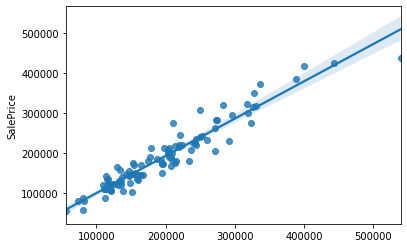

In [37]:
sns.regplot(y_preds,y_test);

In [38]:
(mean_squared_error(y_test,y_preds)**.5)

24608.47603257452

In [39]:
#Clean the test data to prepare for model
df2.drop(['Pool QC','Fence','Misc Feature','Alley'],axis=1,inplace=True)

df2['BsmtFin SF 1']=df2['BsmtFin SF 1'].fillna(0)
df2['Total Bsmt SF'] = df2['Total Bsmt SF'].fillna(0)
df2['Garage Area'] = df2['Garage Area'].fillna(0)
df2['Garage Cars']=df2['Garage Cars'].fillna(0)
df2['Lot Frontage'] = df2['Lot Frontage'].fillna(df['Lot Frontage'].mean())
df2['Overall Cond2'] =  df2['Overall Cond']*df2['Overall Cond']
df2['Overall Qual2'] =  df2['Overall Qual'] * df2['Overall Qual']
df2['Half Bath2'] = df2['Half Bath'] * df2['Half Bath']
df2['Overall Qual*Gr Liv Area'] = df2['Overall Cond'] * df2['Gr Liv Area']
df2['Qual2*Cond2'] = df2['Overall Cond2'] * df2['Overall Qual2'] * df2['Gr Liv Area']
df2['Qual2*Cond3'] = df2['Qual2*Cond2'] * df2['Overall Cond']
df2['Cond3*FBath'] = df2['Overall Cond2'] * df2['Overall Cond'] * df2['Full Bath']

df2 = pd.concat([df2,pd.get_dummies(df2['Foundation'],drop_first=True)], axis=1)
#df2 = pd.concat([df2,pd.get_dummies(df2['Mo Sold'],drop_first=True)], axis=1)
df2 = pd.concat([df2,pd.get_dummies(df2['Yr Sold'],drop_first=True)], axis=1)
df2['GasA'] = [1 if i == 'GasA' else 0 for i in df2['Heating']]
df2['RL'] = [1 if i == 'RL' else 0 for i in df2['MS Zoning']]
df2['SBrkr'] = [1 if i == 'SBrkr' else 0 for i in df2['Electrical']]
df2 = pd.concat([df2,pd.get_dummies(df2['Sale Type'],drop_first=True)], axis=1)
df2 = pd.concat([df2,pd.get_dummies(df2['Paved Drive'],drop_first=True)], axis=1)
df2 = pd.concat([df2,pd.get_dummies(df2['Neighborhood'],drop_first=True)], axis=1)
df2 = pd.concat([df2,pd.get_dummies(df2['MS SubClass'],drop_first=True)], axis=1)
#df2 = pd.concat([df2,pd.get_dummies(df2['Street'],drop_first=True)], axis=1) Removed, were not helpful for data
#df2 = pd.concat([df2,pd.get_dummies(df2['Lot Shape'],drop_first=True)], axis=1) Removed, were not helpful for data
df2 = pd.concat([df2,pd.get_dummies(df2['Lot Config'],drop_first=True)], axis=1)
df2 = pd.concat([df2,pd.get_dummies(df2['Exter Qual'],drop_first=True)], axis=1)
#df2 = pd.concat([df2,pd.get_dummies(df2['Exter Cond'],drop_first=True)], axis=1) Removed, were not helpful for data

df2.shape

(878, 152)

In [40]:
# #Create dummy columns to replace lost values from Neighborhood
df2[1]=0
df2[2]=0


In [42]:
#Save Clean dataset
df2.to_csv('./datasets/test_clean.csv')

In [110]:
#create preds 
preds = model.predict(df2[['Overall Qual*Gr Liv Area','Qual2*Cond2','Qual2*Cond3','Cond3*FBath','Lot Frontage','Lot Area','Gr Liv Area','Overall Cond','Overall Cond2','Overall Qual','Overall Qual2','Low Qual Fin SF','Full Bath','Half Bath','Half Bath2','Bedroom AbvGr','Garage Area',
         'Garage Cars','Kitchen AbvGr','Year Remod/Add','Fireplaces', 'Wood Deck SF','Open Porch SF' ,'CBlock', 'PConc', 'Slab', 'Stone', 'Wood',2007,
         2008,2009,2010,'GasA','RL','SBrkr','CWD', 'Con', 'ConLD', 'ConLI', 'ConLw', 'New','Oth', 'WD ','Y','P',30,40,45,50,60,70,75,80,85,90,120,
            160,180,190,'CulDSac','FR2','FR3','Inside','Fa','Gd', 'TA','Blueste', 'BrDale', 'BrkSide', 'ClearCr',
         'CollgCr','Crawfor','Edwards','Gilbert','Greens',1,'IDOTRR',2,'MeadowV','Mitchel','NAmes','NPkVill','NWAmes','NoRidge',
        'NridgHt','OldTown','SWISU','Sawyer', 'SawyerW', 'Somerst','StoneBr','Timber', 'Veenker']])
        

In [111]:
#Create Submiit dataframe
to_submit = pd.DataFrame()
to_submit['Id'] = df2['Id']
to_submit['SalePrice'] = preds
to_submit.head()

In [114]:
#Save to csv
to_submit.to_csv('./datasets/to_submit.csv',index=False)